# Mortalidade Infantil

## Comparação entre a taxa de mortalidade publicada e a taxa de mortalidade nos "matches" DN-DO

[Cálculo da taxa](http://tabnet.datasus.gov.br/cgi/idb1997/mort/fqc02.htm) = **número de óbitos em menores de um ano (no ano calculado) / número de nascidos vivos (no ano calculado)**

[Taxa publicada no Espírito Santo](https://saude.es.gov.br/Media/sesa/Relatorio%20de%20gestao/Balanco_de_Gestao_Ricardo_de_Oliveira.pdf)
* 2017 = 10,62
* 2016 = 11,66
* 2015 = 11,34
* 2014 = 11,3
* 2013 =  10,89
* 2012 = 11,31





## Importando bibliotecas

### Usaremos o pandas para fazer a importação do banco de dados (dataframe)

In [0]:
import pandas as pd

### Usaremos seaborn (sns) e matplotlib (plt) para visualização

In [0]:
import numpy as np # linear algebra
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output


# Ano de 2016

## Baixar banco de dados

In [0]:
df_sinasc_es_2016 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSkaN1Ye-7puUZMT3J_yuJisowxrmsU3BAsvyfI3ZxD_mKPJ_4fjfnUS9_JH83fAocKWjyRquGMJxde/pub?output=csv')

df_sim_es_2016 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR_MH3HjwGWD0icAnZ3LVxxKUIxYNgAE3R-m-P61g0T2iXE9bs3hjeItGKTJqIUslIOAFN7TrE2ghGM/pub?output=csv')


## Variáveis missing 

### SINASC

In [0]:
df_sinasc_es_2016.isnull().sum(axis=0)

Unnamed: 0        0
NUMERODN          0
CODINST           0
ORIGEM            0
NUMERODV          0
PREFIXODN         0
CODESTAB        157
CODMUNNASC        0
LOCNASC           0
IDADEMAE          0
ESTCIVMAE       252
ESCMAE           41
CODOCUPMAE    53413
QTDFILVIVO      134
QTDFILMORT      224
CODMUNRES         0
GESTACAO        115
GRAVIDEZ         32
PARTO            20
CONSULTAS         0
DTNASC            0
HORANASC         42
SEXO              0
APGAR1          424
APGAR5          409
RACACOR         797
PESO              0
IDANOMAL         78
DTCADASTRO        0
CODANOMAL     52930
              ...  
NATURALMAE      721
CODMUNNATU      721
CODUFNATU       721
ESCMAE2010       43
SERIESCMAE    18196
DTNASCMAE        29
RACACORMAE      798
QTDGESTANT      752
QTDPARTNOR      751
QTDPARTCES      753
IDADEPAI      23535
DTULTMENST    33152
SEMAGESTAC      115
TPMETESTIM      115
CONSPRENAT      176
MESPRENAT      1086
TPAPRESENT      762
STTRABPART      776
STCESPARTO      574


### SIM

In [0]:
df_sim_es_2016.isnull().sum(axis=0)

Unnamed: 0        0
NUMERODO          0
CODINST           0
NUMERODV          0
ORIGEM            0
TIPOBITO          0
DTOBITO           0
HORAOBITO      2155
NUMSUS        21780
NATURAL        3705
CODMUNNATU     4125
DTNASC           44
IDADE             0
SEXO              0
RACACOR        2842
ESTCIV         1806
ESC            3720
ESC2010        3728
SERIESCFAL    19935
OCUP           4948
CODMUNRES         0
LOCOCOR           0
CODESTAB       5677
ESTABDESCR    22868
CODMUNOCOR        0
IDADEMAE      22305
ESCMAE        22315
ESCMAE2010    22315
SERIESCMAE    22651
OCUPMAE       22377
              ...  
DTCADASTRO        2
ATESTANTE       142
STCODIFICA        6
CODIFICADO        0
VERSAOSIST        0
VERSAOSCB         6
FONTEINV      20018
DTRECEBIM         0
ATESTADO          0
DTRECORIGA        0
CAUSAMAT      22868
ESCMAEAGR1    22315
ESCFALAGR1     3728
STDOEPIDEM        0
STDONOVA          0
DIFDATA           0
NUDIASOBCO    21705
NUDIASOBIN    22868
DTCADINV      21692


## Merge dataframes

### Intersecção entre SIM e SINASC

In [0]:
columns_intersection_es_2016 = df_sinasc_es_2016.columns.intersection(df_sim_es_2016.columns)
columns_intersection_es_2016

Index(['Unnamed: 0', 'NUMERODN', 'CODINST', 'ORIGEM', 'NUMERODV', 'CODESTAB',
       'IDADEMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'DTNASC', 'SEXO', 'RACACOR', 'PESO',
       'DTCADASTRO', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'CODMUNNATU', 'ESCMAE2010', 'SERIESCMAE', 'SEMAGESTAC',
       'ESCMAEAGR1'],
      dtype='object')

### Migração do SIM para o SINASC = "left"

In [7]:
df_merged_left_2016 = pd.merge(df_sinasc_es_2016, df_sim_es_2016, how='left', on = 'NUMERODN')
df_merged_left_2016.describe()

,Unnamed: 0_x,NUMERODN,ORIGEM_x,NUMERODV_x,PREFIXODN,CODESTAB_x,CODMUNNASC,LOCNASC,IDADEMAE_x,ESTCIVMAE,...,DTCADINV,TPOBITOCOR,DTCONINV,TPRESGINFO,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA
count,53413.000000,5.341300e+04,53413.0,53413.000000,53413.0,5.325600e+04,53413.000000,53413.000000,53413.000000,53161.000000,...,0.0,0.0,0.0,0.0,0.0,2.770000e+02,277.000000,0.0,0.0,245.000000
mean,26707.000000,7.017404e+07,1.0,4.089585,30.0,3.362035e+06,320300.966488,1.012151,26.757119,2.212073,...,NaN,NaN,NaN,NaN,NaN,1.644685e+07,3.685921,NaN,NaN,1.685714
std,15419.149301,1.613396e+06,0.0,3.030791,0.0,2.153294e+06,1971.363430,0.149334,6.644023,1.491102,...,NaN,NaN,NaN,NaN,NaN,8.189960e+06,1.927748,NaN,NaN,0.465181
min,1.000000,5.498281e+07,1.0,0.000000,30.0,1.250000e+02,130060.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,1.022017e+06,1.000000,NaN,NaN,1.000000
25%,13354.000000,6.882397e+07,1.0,1.000000,30.0,2.448637e+06,320150.000000,1.000000,21.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,1.010202e+07,3.000000,NaN,NaN,1.000000
50%,26707.000000,7.108250e+07,1.0,4.000000,30.0,2.547090e+06,320460.000000,1.000000,27.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,1.606202e+07,3.000000,NaN,NaN,2.000000
75%,40060.000000,7.109900e+07,1.0,7.000000,30.0,4.044916e+06,320520.000000,1.000000,32.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2.309202e+07,3.000000,NaN,NaN,2.000000
max,53413.000000,7.509214e+07,1.0,9.000000,30.0,9.040838e+06,530010.000000,4.000000,52.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,3.110202e+07,9.000000,NaN,NaN,2.000000


### Quantos indivíduos tem a Integração

In [8]:
len(df_merged_left_2016.index)

53413

### Intersecção entre SIM e SINASC = ''inner''

In [9]:
df_merged_inner_2016 = pd.merge(df_sinasc_es_2016, df_sim_es_2016, how='inner', on = 'NUMERODN')
df_merged_inner_2016.describe()

,Unnamed: 0_x,NUMERODN,ORIGEM_x,NUMERODV_x,PREFIXODN,CODESTAB_x,CODMUNNASC,LOCNASC,IDADEMAE_x,ESTCIVMAE,...,DTCADINV,TPOBITOCOR,DTCONINV,TPRESGINFO,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA
count,295.000000,2.950000e+02,295.0,295.000000,295.0,2.890000e+02,295.000000,295.000000,295.000000,294.000000,...,0.0,0.0,0.0,0.0,0.0,2.770000e+02,277.000000,0.0,0.0,245.000000
mean,24083.498305,7.005411e+07,1.0,4.318644,30.0,4.440627e+06,320295.522034,1.047458,26.444068,2.078231,...,NaN,NaN,NaN,NaN,NaN,1.644685e+07,3.685921,NaN,NaN,1.685714
std,15143.046712,1.614310e+06,0.0,3.001160,0.0,2.384356e+06,1858.521197,0.336729,7.381450,1.413249,...,NaN,NaN,NaN,NaN,NaN,8.189960e+06,1.927748,NaN,NaN,0.465181
min,194.000000,6.739182e+07,1.0,0.000000,30.0,1.174600e+04,291072.000000,1.000000,13.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,1.022017e+06,1.000000,NaN,NaN,1.000000
25%,11147.000000,6.880882e+07,1.0,2.000000,30.0,2.547821e+06,320240.000000,1.000000,20.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,1.010202e+07,3.000000,NaN,NaN,1.000000
50%,24308.000000,7.107495e+07,1.0,5.000000,30.0,3.537943e+06,320500.000000,1.000000,26.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,1.606202e+07,3.000000,NaN,NaN,2.000000
75%,35571.000000,7.109859e+07,1.0,7.000000,30.0,7.257406e+06,320520.000000,1.000000,32.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2.309202e+07,3.000000,NaN,NaN,2.000000
max,52868.000000,7.313207e+07,1.0,9.000000,30.0,7.581467e+06,330220.000000,4.000000,46.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,3.110202e+07,9.000000,NaN,NaN,2.000000


In [10]:
len(df_merged_inner_2016.index)

295

### Integração e descrição de todo o banco de dados = ''outer''

In [12]:
df_merged_outer_2016 = pd.merge(df_sinasc_es_2016, df_sim_es_2016, how='outer', on = 'NUMERODN', indicator=True)
df_merged_outer_2016.describe()

,Unnamed: 0_x,NUMERODN,ORIGEM_x,NUMERODV_x,PREFIXODN,CODESTAB_x,CODMUNNASC,LOCNASC,IDADEMAE_x,ESTCIVMAE,...,DTCADINV,TPOBITOCOR,DTCONINV,TPRESGINFO,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA
count,53413.000000,5.345000e+04,53413.0,53413.000000,53413.0,5.325600e+04,53413.000000,53413.000000,53413.000000,53161.000000,...,1.176000e+03,1176.000000,1.160000e+03,35.000000,0.0,6.420000e+02,642.000000,0.0,0.0,574.000000
mean,26707.000000,7.017279e+07,1.0,4.089585,30.0,3.362035e+06,320300.966488,1.012151,26.757119,2.212073,...,1.628081e+07,8.774660,1.596665e+07,1.457143,NaN,1.648294e+07,3.666667,NaN,NaN,1.797909
std,15419.149301,1.614335e+06,0.0,3.030791,0.0,2.153294e+06,1971.363430,0.149334,6.644023,1.491102,...,8.412031e+06,0.804924,8.779305e+06,0.700540,NaN,8.260433e+06,1.900270,NaN,NaN,0.401910
min,1.000000,5.498281e+07,1.0,0.000000,30.0,1.250000e+02,130060.000000,1.000000,12.000000,1.000000,...,1.022017e+06,1.000000,1.022017e+06,1.000000,NaN,1.022017e+06,1.000000,NaN,NaN,1.000000
25%,13354.000000,6.882395e+07,1.0,1.000000,30.0,2.448637e+06,320150.000000,1.000000,21.000000,1.000000,...,9.787017e+06,9.000000,8.092016e+06,1.000000,NaN,1.008702e+07,3.000000,NaN,NaN,2.000000
50%,26707.000000,7.108248e+07,1.0,4.000000,30.0,2.547090e+06,320460.000000,1.000000,27.000000,2.000000,...,1.606202e+07,9.000000,1.601202e+07,1.000000,NaN,1.703202e+07,3.000000,NaN,NaN,2.000000
75%,40060.000000,7.109899e+07,1.0,7.000000,30.0,4.044916e+06,320520.000000,1.000000,32.000000,2.000000,...,2.234452e+07,9.000000,2.305202e+07,2.000000,NaN,2.303202e+07,3.000000,NaN,NaN,2.000000
max,53413.000000,7.509214e+07,1.0,9.000000,30.0,9.040838e+06,530010.000000,4.000000,52.000000,9.000000,...,3.110202e+07,9.000000,3.110202e+07,3.000000,NaN,3.110202e+07,9.000000,NaN,NaN,2.000000


In [13]:
df_merged_outer_2016.head()

,Unnamed: 0_x,NUMERODN,CODINST_x,ORIGEM_x,NUMERODV_x,PREFIXODN,CODESTAB_x,CODMUNNASC,LOCNASC,IDADEMAE_x,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,_merge
0,1.0,69142346.0,MBA2910720001,1.0,8.0,30.0,2507447.0,291072.0,1.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2.0,69204731.0,MBA2913600002,1.0,1.0,30.0,2802112.0,291360.0,1.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3.0,69091312.0,MBA2922000001,1.0,7.0,30.0,2506122.0,292200.0,1.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,4.0,69161083.0,MBA2922000001,1.0,7.0,30.0,2506122.0,292200.0,1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,5.0,69161493.0,MBA2922000001,1.0,0.0,30.0,2498804.0,292200.0,1.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [14]:
df_merged_outer_2016.isnull().sum(axis=0)

Unnamed: 0_x    22573
NUMERODN        22536
CODINST_x       22573
ORIGEM_x        22573
NUMERODV_x      22573
PREFIXODN       22573
CODESTAB_x      22730
CODMUNNASC      22573
LOCNASC         22573
IDADEMAE_x      22573
ESTCIVMAE       22825
ESCMAE_x        22614
CODOCUPMAE      75986
QTDFILVIVO_x    22707
QTDFILMORT_x    22797
CODMUNRES_x     22573
GESTACAO_x      22688
GRAVIDEZ_x      22605
PARTO_x         22593
CONSULTAS       22573
DTNASC_x        22573
HORANASC        22615
SEXO_x          22573
APGAR1          22997
APGAR5          22982
RACACOR_x       23370
PESO_x          22573
IDANOMAL        22651
DTCADASTRO_x    22573
CODANOMAL       75503
                ...  
ATESTANTE       53260
STCODIFICA      53124
CODIFICADO      53118
VERSAOSIST_y    53118
VERSAOSCB       53124
FONTEINV        73136
DTRECEBIM_y     53118
ATESTADO        53118
DTRECORIGA_y    53118
CAUSAMAT        75986
ESCMAEAGR1_y    75433
ESCFALAGR1      56846
STDOEPIDEM      53118
STDONOVA        53118
DIFDATA_y 

### Rename simsim

In [0]:
df_merged_outer_2016.rename(index=str, columns={"_merge": "simsim"})

,Unnamed: 0_x,NUMERODN,CODINST_x,ORIGEM_x,NUMERODV_x,PREFIXODN,CODESTAB_x,CODMUNNASC,LOCNASC,IDADEMAE_x,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,simsim
0,1.0,69142346.0,MBA2910720001,1.0,8.0,30.0,2507447.0,291072.0,1.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2.0,69204731.0,MBA2913600002,1.0,1.0,30.0,2802112.0,291360.0,1.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3.0,69091312.0,MBA2922000001,1.0,7.0,30.0,2506122.0,292200.0,1.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,4.0,69161083.0,MBA2922000001,1.0,7.0,30.0,2506122.0,292200.0,1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,5.0,69161493.0,MBA2922000001,1.0,0.0,30.0,2498804.0,292200.0,1.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,6.0,69161246.0,MBA2922000001,1.0,5.0,30.0,2498804.0,292200.0,1.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,7.0,69201289.0,MBA2922000001,1.0,5.0,30.0,2498804.0,292200.0,1.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,8.0,69161391.0,MBA2931350001,1.0,7.0,30.0,2301008.0,293135.0,1.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,9.0,70601516.0,MMG3101100001,1.0,0.0,30.0,2102587.0,310110.0,1.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,10.0,70601518.0,MMG3101100001,1.0,7.0,30.0,2102587.0,310110.0,1.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## Visualização 

In [15]:
col = df_merged_outer_2016.columns.tolist()
print(col)

['Unnamed: 0_x', 'NUMERODN', 'CODINST_x', 'ORIGEM_x', 'NUMERODV_x', 'PREFIXODN', 'CODESTAB_x', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE_x', 'ESTCIVMAE', 'ESCMAE_x', 'CODOCUPMAE', 'QTDFILVIVO_x', 'QTDFILMORT_x', 'CODMUNRES_x', 'GESTACAO_x', 'GRAVIDEZ_x', 'PARTO_x', 'CONSULTAS', 'DTNASC_x', 'HORANASC', 'SEXO_x', 'APGAR1', 'APGAR5', 'RACACOR_x', 'PESO_x', 'IDANOMAL', 'DTCADASTRO_x', 'CODANOMAL', 'NUMEROLOTE_x', 'VERSAOSIST_x', 'DTRECEBIM_x', 'DIFDATA_x', 'DTRECORIGA_x', 'NATURALMAE', 'CODMUNNATU_x', 'CODUFNATU', 'ESCMAE2010_x', 'SERIESCMAE_x', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC_x', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1_x', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE', 'KOTELCHUCK', 'Unnamed: 0_y', 'NUMERODO', 'CODINST_y', 'NUMERODV_y', 'ORIGEM_y', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NUMSUS', 'NA

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


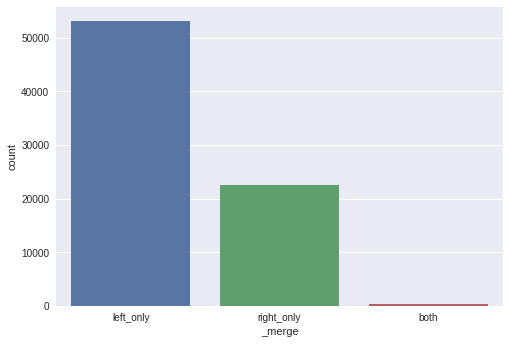

In [0]:
y = df_merged_outer_2016._merge
ax = sns.countplot(y,label="Count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

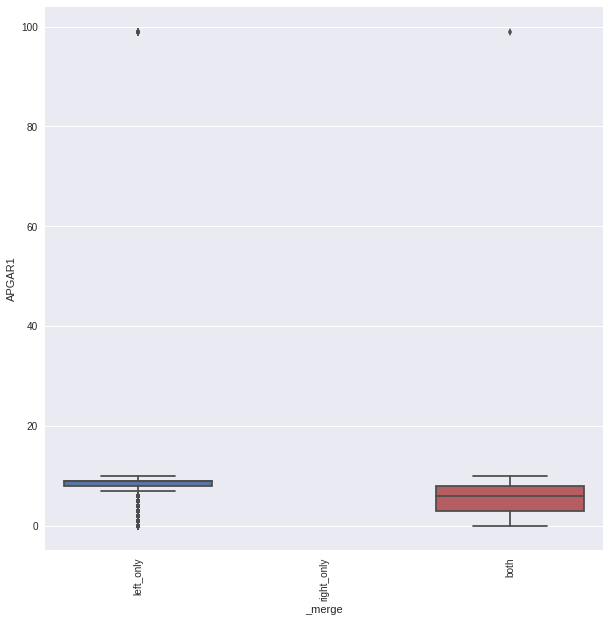

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(y="APGAR1", x="_merge", data=df_merged_outer_2016)
plt.xticks(rotation=90)

### Descrever APGAR1

In [16]:
df_merged_outer_2016.APGAR1.describe()

count    52989.000000
mean         8.367171
std          1.568101
min          0.000000
25%          8.000000
50%          9.000000
75%          9.000000
max         99.000000
Name: APGAR1, dtype: float64

In [23]:
df_merged_outer_2016.isnull().sum(axis=0).APGAR1


22997

### Define outliers de 100

In [18]:
df_merged_outer_2016[df_merged_outer_2016["APGAR1"]>10]["APGAR1"]

15227    99.0
18151    99.0
18452    99.0
20775    99.0
36258    99.0
51437    99.0
52655    99.0
52856    99.0
Name: APGAR1, dtype: float64

In [31]:
df_merged_outer_droped_2016 = df_merged_outer_2016.drop(df_merged_outer_2016[df_merged_outer_2016["APGAR1"]>10].index)
df_merged_outer_droped_2016[df_merged_outer_droped_2016["APGAR1"]>10]

,Unnamed: 0_x,NUMERODN,CODINST_x,ORIGEM_x,NUMERODV_x,PREFIXODN,CODESTAB_x,CODMUNNASC,LOCNASC,IDADEMAE_x,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,_merge


In [0]:
df_merged_outer_droped_2016

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

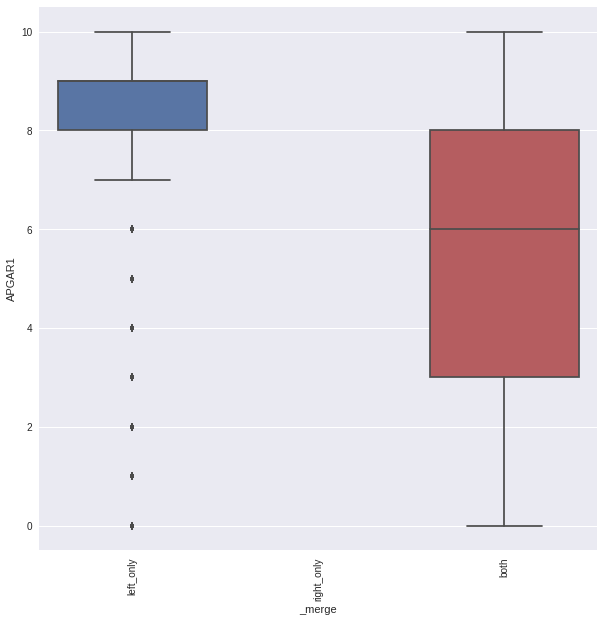

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(y="APGAR1", x="_merge", data=df_merged_outer_droped_2016)
plt.xticks(rotation=90)

Próximos passos
- Filtrar com SIM para achar quem tem <5anos e morreu nos últimos 5 anos
- Fazer reclink para comparar com dados do SINASC e "completar"

# Ano de 2015

In [0]:
df_sinasc_es_2015 = pd.read_csv('')

df_sim_es_2015 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTBTSb2nLPLU8p5N9upwxPeLKVpEdrVPTskJa8bavb48VDdrCHWWxBkp9flQ_M41BS6Uuz-uWsdLNq2/pub?output=csv')


## Ano de 2014


In [0]:
df_sinasc_es_2014 = pd.read_csv('')

df_sim_es_2014 = pd.read_csv('')


## Ano de 2013

In [0]:
df_sinasc_es_2013 = pd.read_csv('')

df_sim_es_2013 = pd.read_csv('')


## Ano de 2012


In [0]:
df_sinasc_es_2012 = pd.read_csv('')
df_sim_es_2012 = pd.read_csv('')
